DATA:

https://www.kaggle.com/datasets/azharsaleem/location-intelligence-data-from-google-map

Starting with a database from kaggle from 2019 and with 15203 businesses and 46 columns or features. I want to analyze the business by they rating, type, and location. In order to answer the following
I want to open a business in city X, where is the best place to do so?

# Scope

- What kind of businesses are close(by location) to each other?  (clustering) "cluster and type_category"

- What type of businesses are more likely to be
successful based on ratings? (general analysis and group by) "type_category" for "ratings"

# Getting the data uploaded

### but first our libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.set_option('display.max_rows', 1000)
#pd.set_option("display.max_columns", None)
#pd.reset_option("display.max_colwidth")

In [3]:
url = "data"
path = "data"+url.split("/")[-2]
original_cl = pd.read_csv(path) #, parse_dates= ['created_date'])

In [4]:
df= original_cl.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

In [6]:
df['country'].nunique()

194

## Cleaning the data. Let's get rid of the null values and duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df.longitude.isna().sum()

5

In [9]:
print(f"5 missing values represents {((df.longitude.isna().sum() / df.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents 0.03289% of the rows in our DataFrame


In [10]:
df = df.loc[~df.longitude.isna(), :]

now let's check for data types:
- Object: types, city, state, country
- Can we use geo_cluster for group by in clusters???

Colums I want to drop to have a better analysis:
- phone_number,name, full_address, website, place_link, Monday-Sunday, verified
- Setting index: business_id?

Maybe drop: timezone, place_id,

In [11]:
if df['business_id'].duplicated().sum() == 0:
  print("business_id is unique and can be used as index")
else:
  print("business_id contains duplicates, consider other options for index")

business_id contains duplicates, consider other options for index


we can see that the duplicates are acutally given on the schedule data set so let's create a table with schedules and one without

In [12]:
# Find rows with duplicated business_id
duplicate_business_ids = df[df['business_id'].duplicated(keep=False)]

# Display the rows with duplicate business_id values
print(duplicate_business_ids)

                                 business_id  phone_number  \
161    0x3e5f5b082b96861f:0x1401d31b640e5fea   97165285288   
214    0x3e5f6b5082d5f92f:0x5204cbb3040abe7b  971504766343   
421    0x3e5f72309b07204d:0xf69a1cd27ef99626  971508942554   
570    0x3ef5f24518e4a34b:0xe43b9bf49b6ed97e  971544507077   
632    0x3e5f5bf31f45d11d:0xbb6db848877a42a0  971552250727   
...                                      ...           ...   
14063  0x3e5f5db3a5555555:0xf850786b19700bc2       Unknown   
14273  0x3e5f5d2db8d00e79:0x8926e0b1355abce8  971562758850   
14596  0x3e5f42d708d974f5:0x446f95484b8eca50     971800900   
14604  0x3e5f682d9449da99:0x37b87033bc90deca  971800728245   
14753  0x3e67671961afbb5b:0x7e8433ef01205789  971506996965   

                                                    name  \
161                                     Sharjah Aquarium   
214                                    VERSION FRANCAISE   
421                Right Solution Auto Repair & car wash   
570            

In [13]:
#new = old[['A','C','D']]

schedules_df= df[['business_id','latitude', 'longitude', 'geo_cluster'
                  ,'Friday_morning'
                  ,'Friday_afternoon'
                  ,'Friday_evening'
                  ,'Saturday_morning'
                  ,'Saturday_afternoon'
                  ,'Saturday_evening'
                  ,'Sunday_morning'
                  ,'Sunday_afternoon'
                  ,'Sunday_evening'
                  ,'Monday_morning'
                  ,'Monday_afternoon'
                  ,'Monday_evening'
                  ,'Tuesday_morning'
                  ,'Tuesday_afternoon'
                  ,'Tuesday_evening'
                  ,'Wednesday_morning'
                  ,'Wednesday_afternoon'
                  ,'Wednesday_evening'
                  ,'Thursday_morning'
                  ,'Thursday_afternoon'
                  ,'Thursday_evening']]

schedules_df.head(5)

,business_id,latitude,longitude,geo_cluster,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,...,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,23.73,53.98,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,23.66,53.74,0.00,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,23.61,58.59,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0x487bb1e7815c44db:0x417132a42bd93ef6,53.48,-2.25,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0x487e78e1955eb419:0x4c55c87f0a46d173,54.88,-1.66,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
schedules_df.set_index('business_id', inplace=True)

In [15]:
df.columns

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country'],
      dtype='object')

In [16]:
#new = old[['A','C','D']]
clean_df=df[['business_id', 'latitude', 'longitude', 'rating','timezone', 'types', 'city', 'country']]
clean_df.head(5)

,business_id,latitude,longitude,rating,timezone,types,city,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,23.73,53.98,4.70,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,23.66,53.74,3.00,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,23.61,58.59,4.60,Asia/Muscat,"National museum, Museum, Tourist attraction",Muscat,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,53.48,-2.25,4.40,Europe/London,"Science museum, Heritage museum, Museum, Touri...",Manchester,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,54.88,-1.66,4.80,Europe/London,"Open air museum, Museum, Tourist attraction",Stanley,United Kingdom


In [17]:
clean_df.set_index('business_id', inplace=True)

In [18]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15198 entries, 0x3e6751d65629cb05:0x27cbb7ddadc7008c to 0x3e5f59e8e515b8c3:0x4a8d23bba66286b
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   15198 non-null  float64
 1   longitude  15198 non-null  float64
 2   rating     15198 non-null  float64
 3   timezone   15198 non-null  object 
 4   types      15198 non-null  object 
 5   city       15198 non-null  object 
 6   country    15198 non-null  object 
dtypes: float64(3), object(4)
memory usage: 949.9+ KB


countries has states in the column

In [19]:
#moving the states to a new column
clean_df['usa_state_code'] = clean_df['country'].str.extract(r'^([A-Z]{2})$')

<ipython-input-19-f8fed566027f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['usa_state_code'] = clean_df['country'].str.extract(r'^([A-Z]{2})$')


In [20]:
# replacing States code with USA
clean_df.loc[clean_df['country'].str.len() == 2, 'country'] = 'USA'

In [21]:
# we also have problems with Canada

# Find rows where 'country' contains ', Canada'
canada_rows = clean_df['country'].str.contains(', Canada', na=False)

In [22]:
# For rows with ', Canada', extract the state code and update columns
clean_df.loc[canada_rows, 'usa_state_code'] = clean_df.loc[canada_rows, 'country'].str.split(', ').str[0]
clean_df.loc[canada_rows, 'country'] = 'Canada'

In [23]:
# Find rows where 'country' contains a comma
comma_rows = clean_df['country'].str.contains(',', na=False)

# For rows with a comma, extract and update values
clean_df.loc[comma_rows, 'usa_state_code'] = clean_df.loc[comma_rows, 'country'].str.split(', ').str[0]
clean_df.loc[comma_rows, 'country'] = clean_df.loc[comma_rows, 'country'].str.split(', ').str[1]

From 194 countries to 83

In [24]:
clean_df['country'].nunique()

83

# Analysis time!

In [25]:
#Analyze the type column
types_counts = clean_df['types'].value_counts()
types_summary = clean_df['types'].describe()

types_counts

,count
types,
Hotel,406
Travel agency,268
Bakery,211
ATM,207
Mosque,205
...,...
"Tourist attraction, Sightseeing tour agency, Tour agency, Tour operator, Travel agency",1
"Tourist attraction, Heritage museum, Aquarium",1
"Tourist attraction, Children's amusement center, Recreation center, Theme park, Aquarium",1


4130 rows of unique businesses

In [26]:
types_summary

,types
count,15198
unique,4130
top,Hotel
freq,406


In [27]:
# Analyze the ratings column
ratings_summary = clean_df['rating'].describe()
ratings_distribution = clean_df['rating'].value_counts().sort_index(ascending=False)

ratings_summary


,rating
count,15198.00
mean,4.29
std,0.67
min,1.00
25%,4.10
50%,4.40
75%,4.70
max,5.00


In [28]:
ratings_distribution

,count
rating,
5.00,2184
4.90,566
4.80,810
4.70,774
4.60,793
4.50,899
4.40,3397
4.30,812
4.20,673


In [29]:
# Comparig columns 'types' and 'rating'
average_ratings_by_type = clean_df.groupby('types')['rating'].mean()

# Display the average ratings for each business type
print(average_ratings_by_type)

types
ATM                                                                                                                  3.74
ATM, Bank                                                                                                            4.30
ATM, Banking and finance                                                                                             3.30
Accountant                                                                                                           4.55
Accountant, Accounting firm, Accounting software company, Bookkeeping service, Consultant, Tax preparation service   4.40
                                                                                                                     ... 
Zoo, Park, Tourist attraction, Wildlife and safari park                                                              4.40
Zoo, Theme park, Tourist attraction                                                                                  4.30
Zoo, Tourist attra

In [30]:
#import matplotlib.pyplot as plt

# Sort the average ratings for better visualization
#sorted_ratings = average_ratings_by_type.sort_values(ascending=False)

# Create a bar chart
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
#plt.bar(sorted_ratings.index, sorted_ratings.values)
#plt.xticks(rotation=90)  # Rotate x-axis labels for readability
#plt.xlabel("Business Type")
#plt.ylabel("Average Rating")
#plt.title("Comparison of Business Types and Ratings")
#plt.tight_layout()
#plt.show()

### Grouping types; 4130 to 10 categories!
working with strings

In [31]:
# Reset the 'type_category' column to empty strings before applying the new categorization rules
clean_df["type_category"] = ""

# Apply categorization rules

# 1. Food & Beverage
clean_df.loc[clean_df["types"].str.contains("restaurant|cafe|bakery|coffee shop|bar|pub|fast food|ice cream|pizzeria|deli|steakhouse|bistro|tea house", case=False), "type_category"] = "Food_Beverage"

# 2. Tourism
clean_df.loc[clean_df["types"].str.contains("tourist attraction|museum|park|casino|amusement park|zoo|aquarium|gallery|spa|resort|theme park", case=False), "type_category"] = "Tourism"

# 3. Retail & Shopping
clean_df.loc[clean_df["types"].str.contains("convenience store|shopping mall|clothing store|supermarket|jewelry store|electronics store|gift shop|furniture store|bookstore|toy store|pharmacy|department store", case=False), "type_category"] = "Retail_Shopping"

# 4. Finance
clean_df.loc[clean_df["types"].str.contains("ATM|bank|currency exchange|insurance agency|loan agency", case=False), "type_category"] = "Finance"

# 5. Automotive
clean_df.loc[clean_df["types"].str.contains("car dealer|used car dealer|gas station|auto repair|car rental|car wash|tire shop|truck dealer", case=False), "type_category"] = "Automotive"

# 6. Profesional Serv
clean_df.loc[clean_df["types"].str.contains("roofing contractor|graphic designer|service establishment|consulting|lawyer|accountant|architect|cleaning service|photographer", case=False), "type_category"] = "Professional_serv"

# 7. Healthcare
clean_df.loc[clean_df["types"].str.contains("hospital|clinic|dentist|pharmacy|doctor|nursing home|optometrist|veterinarian", case=False), "type_category"] = "Healthcare"

# 8. Education
clean_df.loc[clean_df["types"].str.contains("school|college|university|library|tutoring|training center", case=False), "type_category"] = "Education"

# 9. Real Estate
clean_df.loc[clean_df["types"].str.contains("real estate|property management|apartment|housing|estate agent", case=False), "type_category"] = "Real_Estate"

# 10. Entertainment
clean_df.loc[clean_df["types"].str.contains("cinema|theater|concert hall|bowling alley|nightclub|arcade", case=False), "type_category"] = "Entertainment"


<ipython-input-31-b4bca2aab659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["type_category"] = ""


In [32]:
clean_df.head(5)

,latitude,longitude,rating,timezone,types,city,country,usa_state_code,type_category
business_id,,,,,,,,,
0x3e6751d65629cb05:0x27cbb7ddadc7008c,23.73,53.98,4.70,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates,NaN,Tourism
0x3e675d61493af035:0xa4f20f24f9e8beb7,23.66,53.74,3.00,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates,NaN,Tourism
0x3e91f7041ac64d33:0x6120c5af14b63b93,23.61,58.59,4.60,Asia/Muscat,"National museum, Museum, Tourist attraction",Muscat,Oman,NaN,Tourism
0x487bb1e7815c44db:0x417132a42bd93ef6,53.48,-2.25,4.40,Europe/London,"Science museum, Heritage museum, Museum, Touri...",Manchester,United Kingdom,NaN,Tourism
0x487e78e1955eb419:0x4c55c87f0a46d173,54.88,-1.66,4.80,Europe/London,"Open air museum, Museum, Tourist attraction",Stanley,United Kingdom,NaN,Tourism


## Ratings and Business type

In [33]:
average_ratings_by_category = clean_df.groupby('type_category')['rating'].mean().sort_values(ascending=False)
print(average_ratings_by_category)

type_category
Healthcare          4.48
Professional_serv   4.45
Education           4.36
Tourism             4.33
                    4.31
Retail_Shopping     4.29
Automotive          4.25
Food_Beverage       4.23
Real_Estate         4.22
Entertainment       4.10
Finance             3.67
Name: rating, dtype: float64


With the below graph we can also see the low ratings

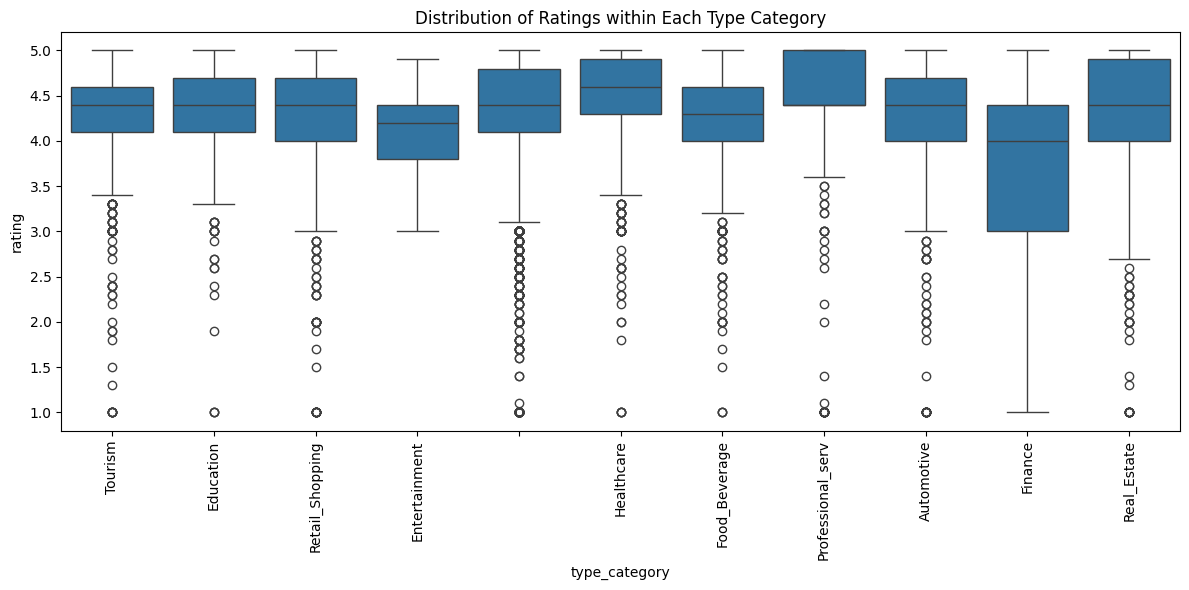

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='type_category', y='rating', data=clean_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Distribution of Ratings within Each Type Category')
plt.tight_layout()
plt.show()

with the below graph we see all is "good" no low ratings really showing

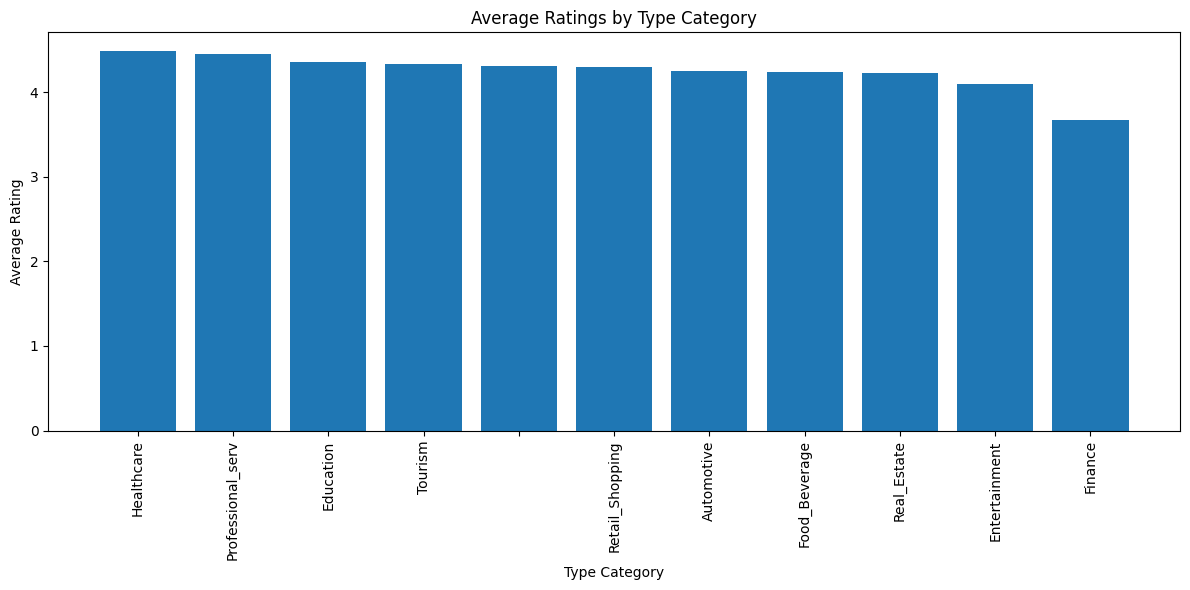

In [35]:
# Calculate average ratings by type category
average_ratings_by_category = clean_df.groupby('type_category')['rating'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(average_ratings_by_category.index, average_ratings_by_category.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Type Category")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Type Category")
plt.tight_layout()
plt.show()

In [36]:
# Check for uncategorized products
uncategorized = clean_df[clean_df['type_category'] == ""]
print(f"Number of uncategorized businesses: {len(uncategorized)}")

Number of uncategorized businesses: 6210


# Clustering starts here

In [37]:
df.columns

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country'],
      dtype='object')

# How should I scale latitude and long?




- Standardizing latitude/longitude is a horrible idea. These values are angles on a sphere. Linearly scaling these values breaks everything that these values mean. There are many valid transformations - even rotations can be good to get a desirable Mercator protection, for example. But standardizing them, I cannot imagine what this would be good for.
- Mixing variables with different meaning rarely works well. It's not just the problem of scale. Scaling often helps as a heuristic to prevent one variable dominating another. It also has the nice property that it doesn't matter if your data were feet or yards. But the need to do so usually means that there is something wrong with your approach at a deeper level: that you apparently are trying really hard to compare apples and oranges... You'll get out some result. It's probably even interesting. But once you try to explain or act on it, you're back to square one: what does it mean if you scale your data this way, and why is that better than the infinitely many alternative ways, infinitely many of which lead to other results?

- MAIN INSPIRATION! https://github.com/gboeing/data-visualization/blob/main/location-history/google-location-history-cluster.ipynb  

- https://medium.com/thelorry-product-tech-data/the-clustering-algorithm-with-geolocation-data-d6dd07ed36a

- https://geodacenter.github.io/workbook/9a_spatial1/lab9a.html#clustering-on-geographical-coordinates


chatGPT
When working with geospatial data, such as latitude and longitude, **DBSCAN** is often better suited than **k-means** for several reasons:

### 1. **DBSCAN Handles Arbitrary Shapes of Clusters**
   - **K-means** assumes clusters are spherical or convex, which doesn't fit well with real-world geographic clusters that may have irregular shapes (e.g., following coastlines or mountain ranges).
   - **DBSCAN** can form clusters of any shape, as it groups points that are density-connected.

### 2. **DBSCAN Doesn't Require the Number of Clusters**
   - **K-means** requires you to predefine the number of clusters (\(k\)), which can be challenging with geospatial data where the number of clusters isn't known in advance.
   - **DBSCAN** automatically determines the number of clusters based on the density of points and the defined parameters (\(eps\) and \(minPts\)).

### 3. **DBSCAN Is Robust to Outliers**
   - Geospatial datasets often include outliers (e.g., isolated points far from clusters). **K-means** assigns every point to a cluster, which can distort the cluster centroids.
   - **DBSCAN** classifies isolated points as noise, effectively handling outliers without affecting the clustering.

### 4. **Geospatial Data Is Not Euclidean**


Taking the variables we need from our main table "df"

In [38]:
#new = old[['A','C','D']]
geo_df = df[['latitude', 'longitude']]

geo_df

,latitude,longitude
0,23.73,53.98
1,23.66,53.74
2,23.61,58.59
3,53.48,-2.25
4,54.88,-1.66
...,...,...
15198,25.39,55.43
15199,25.38,55.46
15200,25.39,55.46
15201,25.16,55.42


Map of latitude and Longitude WITHOUT clusters

In [39]:
import plotly.express as px

fig = px.scatter_mapbox(geo_df,
                        lat="latitude",
                        lon="longitude",
                        hover_data=["latitude", "longitude"],
                        zoom=1,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

Libraries for UML

In [40]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

preping the data

In [41]:
# Extracting latitude and logitude values into coords
coords = geo_df[['latitude', 'longitude']].values

In [42]:
#calculating the great circle distance between points
def get_distance(p1, p2):
  return great_circle(p1, p2).kilometers

kms_per_radian: The number of kilometers per radian on Earth's surface.
epsilon: The radius (in radians) for defining the neighborhood of a point.
DBSCAN: Creates a DBSCAN object with the specified parameters:
eps: The radius for neighborhood definition.
min_samples: The minimum number of points to form a dense region.
algorithm: The algorithm to use for finding neighbors.
metric: The distance metric to use.
fit: Applies the DBSCAN algorithm to the data.
cluster_labels: The cluster assignments for each data point.
num_clusters: The number of clusters found.
clusters: A pandas Series containing the coordinates of points in each cluster.

# DBSCAN clustering

In [43]:
#Applying DBSCAN clustering to "coords"

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 2985


2985 total clusters!

In [44]:
# adding the labels of the clusters to our geo_df table
geo_df['cluster'] = cluster_labels
geo_df.head(10)

<ipython-input-44-96ba6bfb2d7d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,latitude,longitude,cluster
0,23.73,53.98,0
1,23.66,53.74,1
2,23.61,58.59,2
3,53.48,-2.25,3
4,54.88,-1.66,4
5,52.48,-1.90,5
6,52.10,0.14,6
7,25.36,69.73,7
8,55.87,-4.29,8
9,52.52,-2.08,9


In [45]:
pd.reset_option("^display") # I was seeing too much ;)

Checking wich cluster has more businesses in it. 87 is the winner with 8123 businesses!

In [46]:
geo_df['cluster'].value_counts()

,count
cluster,
87,8123
369,915
1,353
50,332
117,309
...,...
1179,1
1180,1
1181,1


DBSCAN is a density-based clustering algorithm that groups together points that are closely packed. It's suitable for spatial data because it can identify clusters of arbitrary shape and is robust to outliers. By applying DBSCAN to your latitude and longitude data, you can effectively identify clusters of businesses or locations that are geographically close to each other.

## visualizing MAP of latitude and longitude WITH clusters!

In [47]:
!pip install plotly==5.15.0
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


So... pretty!

In [48]:
#creating a scatter mapbox
fig = px.scatter_mapbox(geo_df, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color="cluster", zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

px.scatter_mapbox: Creates a scatter plot on a map using Mapbox as the basemap.
lat="latitude", lon="longitude": Specifies the columns containing latitude and longitude data.
hover_name="cluster", hover_data=["latitude", "longitude"]: Displays the cluster label and coordinates when hovering over a data point.
color="cluster": Colors the data points based on their cluster assignment.
zoom=1: Sets the initial zoom level of the map.
height=600: Sets the height of the plot in pixels.
fig.update_layout(mapbox_style="open-street-map"): Uses OpenStreetMap as the basemap style.
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}): Removes margins around the plot.
fig.show(): Displays the plot.

This code utilizes the plotly.express library to create an interactive scatter plot on a map. By specifying the latitude and longitude columns, it plots your data points on the map. Coloring the points based on their cluster assignment helps visualize the spatial distribution of the clusters. The interactive nature of the plot allows you to zoom in, pan, and hover over data points for more detailed information.

## Looking into cluster 87- Actally Dubai :)

In [49]:
cluster_87_df = geo_df[geo_df['cluster'] == 87]

In [50]:
#scatter plot!
fig = px.scatter_mapbox(cluster_87_df, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color_discrete_sequence=["blue"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Merging all cluster labels with clean_df

In [51]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15198 entries, 0 to 15202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   15198 non-null  float64
 1   longitude  15198 non-null  float64
 2   cluster    15198 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 474.9 KB


In [52]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15198 entries, 0x3e6751d65629cb05:0x27cbb7ddadc7008c to 0x3e5f59e8e515b8c3:0x4a8d23bba66286b
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        15198 non-null  float64
 1   longitude       15198 non-null  float64
 2   rating          15198 non-null  float64
 3   timezone        15198 non-null  object 
 4   types           15198 non-null  object 
 5   city            15198 non-null  object 
 6   country         15198 non-null  object 
 7   usa_state_code  1894 non-null   object 
 8   type_category   15198 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.7+ MB


## creating copies of the tables and merging

In [53]:
world_df= geo_df.copy()

In [54]:
clu_cle_df = clean_df.copy()

In [55]:
# If 'business_id' is the index in clean_df, reset it
if 'business_id' in clu_cle_df.index.names:
    clu_cle_df = clu_cle_df.reset_index()

In [56]:
# Set latitude and longitude as index for both DataFrames
world_df = world_df.set_index(['latitude', 'longitude'])
clu_cle_df = clu_cle_df.set_index(['latitude', 'longitude'])

In [57]:
# Merge DataFrames using 'join' method
clu_cle_df = clu_cle_df.join(world_df[['cluster']], how='left')

## Important and full table "clu_cle_df"; cluster and clean df :P

In [58]:
# Reset index if you want to restore latitude and longitude as regular columns
clu_cle_df = clu_cle_df.reset_index()
#clu_cle_df.set_index('business_id', inplace=True)
clu_cle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23802 entries, 0 to 23801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        23802 non-null  float64
 1   longitude       23802 non-null  float64
 2   business_id     23802 non-null  object 
 3   rating          23802 non-null  float64
 4   timezone        23802 non-null  object 
 5   types           23802 non-null  object 
 6   city            23802 non-null  object 
 7   country         23802 non-null  object 
 8   usa_state_code  1896 non-null   object 
 9   type_category   23802 non-null  object 
 10  cluster         23802 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 2.0+ MB


In [59]:
#droping duplicates
clu_cle_df = clu_cle_df.drop_duplicates(subset='business_id', keep='first')

## Analysing type_category with AVG rating

let's see what happens if I merge my three results together

In [60]:
# Group by 'loc_cluster' and 'type_category' and calculate the average rating
cluster_type_ratings = clu_cle_df.groupby(['cluster', 'type_category'])['rating'].mean()#.reset_index(name='avg_rating')

# Display the results
print(cluster_type_ratings)

cluster  type_category    
0        Tourism              4.700000
1                             4.239130
         Automotive           4.100000
         Education            4.258333
         Finance              4.400000
                                ...   
2980     Automotive           4.400000
2981     Professional_serv    1.000000
2982     Automotive           5.000000
2983     Professional_serv    4.400000
2984     Professional_serv    4.400000
Name: rating, Length: 3453, dtype: float64


Great! next step is to move this table to get a more indeph analysis on the type_category and the clusters!

Question: How the same type_categories do in different clusters or countries?

In [61]:
#Downloading to csv

#from google.colab import files
#business_df.to_csv('business_df.csv')
#files.download('business_df.csv')

In [62]:
#Dispolaying max rows
#pd.set_option('display.max_rows', None)

# LISARDO'S remarks.- my instructor :)



Al observar el mapa global con los 2,985 clusters, me pregunto si los negocios están demasiado dispersos como para encontrar una relación significativa entre ellos. Por lo tanto, te sugiero que tal vez intentes
- enfocarte en un país o ciudad, por ejemplo, y realices clusters dentro de ese país.

De esta manera, podrías, tal vez por casualidad (aquí está la magia del aprendizaje no supervisado),
- identificar zonas en un país o ciudad donde hacer negocios sea más estratégico.

Esto es solo una sugerencia. Tal vez en tu próxima exploración encuentres algo que refuerce la narrativa del proyecto.
Una vez logrado eso, y en caso de que aún tengas dudas sobre cómo continuar, creo que podrías dedicar algo de tiempo a implementar este código en una
- aplicación web sencilla, como Streamlit. Algo así:
https://prettymapp.streamlit.app/
+ ideas

## Focusing on a country "USA" for the clustering

In [63]:
# calling on our main table clean_df
country= clean_df.copy()

In [64]:
USA_df= country[country['country'] == "USA"]
USA_df.head(5)

,latitude,longitude,rating,timezone,types,city,country,usa_state_code,type_category
business_id,,,,,,,,,
0x89c25896f660c26f:0x3b2fa4f4b6c6a1fa,40.779437,-73.963244,4.8,America/New_York,"Art museum, Arts organization, Museum, Non-pro...",New York,USA,NY,Tourism
0x89c258f97bdb102b:0xea9f8fc0b3ffff55,40.761433,-73.977622,4.6,America/New_York,"Modern art museum, Art gallery, Art museum, Mu...",New York,USA,NY,Tourism
0x89d6b5073e2c5ef1:0xa0d7874fe0264a6,43.152548,-77.601629,4.8,America/New_York,"Children's museum, History museum, Tourist att...",Rochester,USA,NY,Tourism
0x872b12425b1150ab:0xdc4b09e8041cd722,33.472581,-112.072233,4.7,America/Phoenix,"Art museum, Art gallery, Book store, Event ven...",Phoenix,USA,AZ,Retail_Shopping
0x5490423922701547:0x1a492897619baaa,47.518538,-122.296854,4.8,America/Los_Angeles,"Museum, Museum of space history, Tourist attra...",Seattle,USA,WA,Tourism


Getting latitude and longitude for all businesses located in the USA

In [65]:
#new = old[['A','C','D']]
geo_usa = USA_df[['latitude', 'longitude']]

geo_usa.head(5)

,latitude,longitude
business_id,,
0x89c25896f660c26f:0x3b2fa4f4b6c6a1fa,40.779437,-73.963244
0x89c258f97bdb102b:0xea9f8fc0b3ffff55,40.761433,-73.977622
0x89d6b5073e2c5ef1:0xa0d7874fe0264a6,43.152548,-77.601629
0x872b12425b1150ab:0xdc4b09e8041cd722,33.472581,-112.072233
0x5490423922701547:0x1a492897619baaa,47.518538,-122.296854


Clustering the USA

In [66]:
# Extracting latitude and logitude values into coords
coords_USA = geo_usa[['latitude', 'longitude']].values

In [67]:
#calculating the great circle distance between points
def get_distance(p1, p2):
  return great_circle(p1, p2).kilometers

In [68]:
#Applying DBSCAN clustering

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_USA))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters_usa = pd.Series([coords_USA[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 1443


### 1443 clusters for USA

In [69]:
# adding clusters to our geo_usa table
geo_usa['cluster'] = cluster_labels
geo_usa.head(10)

<ipython-input-69-801f9bbdf88f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,latitude,longitude,cluster
business_id,,,
0x89c25896f660c26f:0x3b2fa4f4b6c6a1fa,40.779437,-73.963244,0
0x89c258f97bdb102b:0xea9f8fc0b3ffff55,40.761433,-73.977622,0
0x89d6b5073e2c5ef1:0xa0d7874fe0264a6,43.152548,-77.601629,1
0x872b12425b1150ab:0xdc4b09e8041cd722,33.472581,-112.072233,2
0x5490423922701547:0x1a492897619baaa,47.518538,-122.296854,3
0x880519008f6a71c5:0xded31797fd5a229d,43.040073,-87.897058,4
0x87c91a14c433925b:0xad260359e45b143b,36.381854,-94.202652,5
0x52b332b1593a494f:0xc52ce3002e7d7ca6,44.958500,-93.273218,6
0x883b872d2204a47f:0x1d8989aab4b94e07,41.658327,-83.559325,7


For the USA the clusters with most businesses are 165 and 775 with only 11 business. That seem like a small cluster to analyse...

In [70]:
geo_usa['cluster'].value_counts()

,count
cluster,
165,11
775,11
166,8
283,7
1291,7
...,...
520,1
519,1
518,1


In [71]:
#creating a scatter mapbox
fig = px.scatter_mapbox(geo_usa, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color="cluster", zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Decided to zoom in to cluster 369!! which is Frankfurt
why 369? because is the secon "overall" cluster with most businesses. Secong to cluster 87 - Dubai

Getting our coordinates for Frankfurt for a new clustering trip

In [72]:
frank_geo = geo_df[geo_df['cluster'] == 369]

In [73]:
#Map of Frankfurt WITHOUT clustering
fig = px.scatter_mapbox(frank_geo, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color_discrete_sequence=["blue"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [74]:
# Extracting latitude and logitude values into coords_frank
coords_frank = frank_geo[['latitude', 'longitude']].values

#calculating the great circle distance between points
def get_distance(p1, p2):
  return great_circle(p1, p2).kilometers

#Applying DBSCAN clustering to coords_frank

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_frank))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters_frank = pd.Series([coords_frank[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))



Number of clusters: 60


60 clusters for Frankfurt!

In [75]:
# adding clusters to our frank_geo table
frank_geo['cluster'] = cluster_labels

frank_geo['cluster'].value_counts()

<ipython-input-75-83927564785f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
cluster,
0,781
24,12
21,8
13,8
10,7
3,5
19,5
41,4
28,4


In [76]:
#creating a scatter mapbox for Frankfurt WITH clusters
fig = px.scatter_mapbox(frank_geo, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color="cluster", zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

60 clusters seem to be a small number...

### Merging Frankfurt cluster with clean_df

In [77]:
FK_df = clean_df.copy()

In [78]:
# If 'business_id' is the index in clean_df, reset it
if 'business_id' in FK_df.index.names:
    FK_df = FK_df.reset_index()

In [79]:
# Set latitude and longitude as index for both DataFrames
frank_geo = frank_geo.set_index(['latitude', 'longitude'])
FK_df = FK_df.set_index(['latitude', 'longitude'])

In [80]:
# Merge DataFrames using 'join' method
FK_df = FK_df.join(frank_geo[['cluster']], how='left')

In [81]:
# Reset index if you want to restore latitude and longitude as regular columns
FK_df = FK_df.reset_index()
#FK_df.set_index('business_id', inplace=True)
FK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15348 entries, 0 to 15347
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        15348 non-null  float64
 1   longitude       15348 non-null  float64
 2   business_id     15348 non-null  object 
 3   rating          15348 non-null  float64
 4   timezone        15348 non-null  object 
 5   types           15348 non-null  object 
 6   city            15348 non-null  object 
 7   country         15348 non-null  object 
 8   usa_state_code  1894 non-null   object 
 9   type_category   15348 non-null  object 
 10  cluster         1065 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.3+ MB


In [82]:
#droping duplicates
FK_df = FK_df.drop_duplicates(subset='business_id', keep='first')

In [83]:
cleanFK_df = FK_df.dropna(subset=['cluster'])

### ANALYSIS

Grouping cleanFK_df to compare type_category and AVG ratings and downloading our table for further analysis. - Looker

In [84]:
FKcluster_type_ratings = cleanFK_df.groupby(['cluster', 'type_category'])['rating'].mean().reset_index(name='avg_rating')
print(FKcluster_type_ratings)

    cluster    type_category  avg_rating
0       0.0                     4.281120
1       0.0       Automotive    4.650000
2       0.0        Education    4.766667
3       0.0          Finance    4.400000
4       0.0    Food_Beverage    4.185714
..      ...              ...         ...
71     55.0  Retail_Shopping    4.400000
72     56.0  Retail_Shopping    4.400000
73     57.0                     4.400000
74     58.0                     4.400000
75     59.0                     5.000000

[76 rows x 3 columns]


# Making the map input thingy - Frankfurt

In [85]:
#So ... where at?

import plotly.express as px

# Get the cluster value dynamically from the user
cluster_value = int(input("So.. where at?: "))

# Filter the DataFrame based on the user-provided cluster value
FKcluster_interesting_data = cleanFK_df[cleanFK_df['cluster'] == cluster_value]

# Create the scatter mapbox
fig = px.scatter_mapbox(FKcluster_interesting_data, lat="latitude", lon="longitude",
                        color_discrete_sequence=["red"],
                        zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Back to 87 as it is the cluster with most businesses- 8123 to be precise

In [86]:
cluster_87_df.head(10)

,latitude,longitude,cluster
98,25.278807,55.355861,87
99,25.331463,55.358635,87
100,25.264473,55.303994,87
101,25.357492,55.384369,87
102,25.361393,55.387007,87
103,25.301937,55.375855,87
104,25.256778,55.336595,87
105,25.349667,55.424783,87
106,25.335128,55.383294,87
107,25.364844,55.389231,87


Takig the coordinates for table cluster_87_df to start clustering 87. We have that table from our "overall" clustering

In [87]:
cluster_87_df
geo_87 = cluster_87_df[['latitude', 'longitude']]

In [88]:
# Extracting latitude and logitude values into coords_87
coords_87 = geo_87[['latitude', 'longitude']].values

#calculating the great circle distance between points
def get_distance(p1, p2):
  return great_circle(p1, p2).kilometers

#Applying DBSCAN clustering to coords_87

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian #reduce epsilon from 1.5 to 0.5
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_87)) #reduce min samples to 3
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters_87 = pd.Series([coords_87[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 85


OK 85 clusters!

In [89]:
# adding clusters to our geo_87 table
geo_87['cluster'] = cluster_labels

#creating a scatter mapbox for Dubai WITH clusters

fig = px.scatter_mapbox(geo_87, lat="latitude", lon="longitude",
                        hover_name="cluster", hover_data=["latitude", "longitude"],
                        color="cluster", zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [90]:
geo_87['cluster'].value_counts()

,count
cluster,
0,6378
2,432
-1,217
3,132
20,108
...,...
62,3
59,3
58,3


## Merging Dubai's clusters with clean_df for further analysis

In [91]:
geo_87.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8123 entries, 98 to 15202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   8123 non-null   float64
 1   longitude  8123 non-null   float64
 2   cluster    8123 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 253.8 KB


In [92]:
full87_df =clean_df.copy() #creating a copy of clean_df just in case :)

Merging!

In [93]:
# If 'business_id' is the index in full87_df, reset it
if 'business_id' in full87_df.index.names:
    full87_df = full87_df.reset_index()

In [94]:
# Set latitude and longitude as index for both DataFrames
geo_87 = geo_87.set_index(['latitude', 'longitude'])
full87_df = full87_df.set_index(['latitude', 'longitude'])

In [95]:
# Merge DataFrames using 'join' method
full87_df = full87_df.join(geo_87[['cluster']], how='left')

In [96]:
# Reset index if you want to restore latitude and longitude as regular columns
full87_df = full87_df.reset_index()
#full87_df.set_index('business_id', inplace=True)
full87_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        19642 non-null  float64
 1   longitude       19642 non-null  float64
 2   business_id     19642 non-null  object 
 3   rating          19642 non-null  float64
 4   timezone        19642 non-null  object 
 5   types           19642 non-null  object 
 6   city            19642 non-null  object 
 7   country         19642 non-null  object 
 8   usa_state_code  1894 non-null   object 
 9   type_category   19642 non-null  object 
 10  cluster         12567 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.6+ MB


In [97]:
full87_df.head(5)

,latitude,longitude,business_id,rating,timezone,types,city,country,usa_state_code,type_category,cluster
0,23.733973,53.980629,0x3e6751d65629cb05:0x27cbb7ddadc7008c,4.7,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates,NaN,Tourism,NaN
1,23.657332,53.741881,0x3e675d61493af035:0xa4f20f24f9e8beb7,3.0,Asia/Dubai,Museum,Abu Dhabi,United Arab Emirates,NaN,Tourism,NaN
2,23.611601,58.593728,0x3e91f7041ac64d33:0x6120c5af14b63b93,4.6,Asia/Muscat,"National museum, Museum, Tourist attraction",Muscat,Oman,NaN,Tourism,NaN
3,53.477136,-2.254582,0x487bb1e7815c44db:0x417132a42bd93ef6,4.4,Europe/London,"Science museum, Heritage museum, Museum, Touri...",Manchester,United Kingdom,NaN,Tourism,NaN
4,54.884752,-1.659321,0x487e78e1955eb419:0x4c55c87f0a46d173,4.8,Europe/London,"Open air museum, Museum, Tourist attraction",Stanley,United Kingdom,NaN,Tourism,NaN


In [98]:
#DROP NaN
clean87_df = full87_df.dropna(subset=['cluster'])

In [99]:
clean87_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12567 entries, 98 to 19641
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        12567 non-null  float64
 1   longitude       12567 non-null  float64
 2   business_id     12567 non-null  object 
 3   rating          12567 non-null  float64
 4   timezone        12567 non-null  object 
 5   types           12567 non-null  object 
 6   city            12567 non-null  object 
 7   country         12567 non-null  object 
 8   usa_state_code  0 non-null      object 
 9   type_category   12567 non-null  object 
 10  cluster         12567 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.2+ MB


In [100]:
#droping duplicates
clean87_df = clean87_df.drop_duplicates(subset='business_id', keep='first')

### Grouping clean87_df by cluster, type_category, and AVG rating

In [101]:
cluster_type_ratings = clean87_df.groupby(['cluster', 'type_category'])['rating'].mean().reset_index(name='avg_rating')
print(cluster_type_ratings)

     cluster  type_category  avg_rating
0       -1.0                   4.380328
1       -1.0     Automotive    4.300000
2       -1.0      Education    4.000000
3       -1.0        Finance    3.748000
4       -1.0  Food_Beverage    4.362500
..       ...            ...         ...
328     81.0     Healthcare    4.700000
329     82.0        Tourism    4.666667
330     83.0                   4.600000
331     83.0      Education    4.400000
332     83.0        Tourism    3.800000

[333 rows x 3 columns]


Downloading cluster_type_rating for Dubai for further analysis. - Looker

In [102]:
#Downloading to csv

#from google.colab import files
#FKcluster_type_ratings.to_csv('FKcluster_type_ratings.csv')
#files.download('FKcluster_type_ratings.csv')

Once we know the type of business we want to open? we check the number of cluster where the type_category fits and has a high rating. Or the opposite to gain more clients?

In [103]:
# we show where exactly custer of preference is located!
import plotly.express as px

cluster_interesting_data = clean87_df[clean87_df['cluster'] == 6]

fig = px.scatter_mapbox(cluster_interesting_data, lat="latitude", lon="longitude",
                        color_discrete_sequence=["red"],
                        zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Making the map into an input thingy - Dubai

In [131]:
import plotly.express as px

# Get the cluster value dynamically from the user
cluster_value = int(input("So.. where at?: "))

# Filter the DataFrame based on the user-provided cluster value
cluster_interesting_data = clean87_df[clean87_df['cluster'] == cluster_value]

# Create the scatter mapbox
fig = px.scatter_mapbox(cluster_interesting_data, lat="latitude", lon="longitude",
                        color_discrete_sequence=["red"],
                        zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


So.. where at?: 10


# EXTRA WORK

# Clustering Lat and Long AND RATING for cluster 87
for this I can not use DBSCAN as I have three columns and rating and coordinates are measured differently.
So it is necesary to apply scaling and set a predefined number of clusters for the analysis

In [105]:
#new = old[['A','C','D']]
geo_rating87 = clean87_df[['latitude', 'longitude','rating']]

geo_rating87.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 98 to 19641
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   8040 non-null   float64
 1   longitude  8040 non-null   float64
 2   rating     8040 non-null   float64
dtypes: float64(3)
memory usage: 251.2 KB


Rating and location are in different scales..

In [106]:
from sklearn.metrics import pairwise_distances #only runs with python 3.12.7- vscode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

sacling with MinMax and ploting the distribution

In [108]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/

# Scale the foods_df DataFrame
geo_scale_minmax = scaler.fit_transform(geo_rating87)

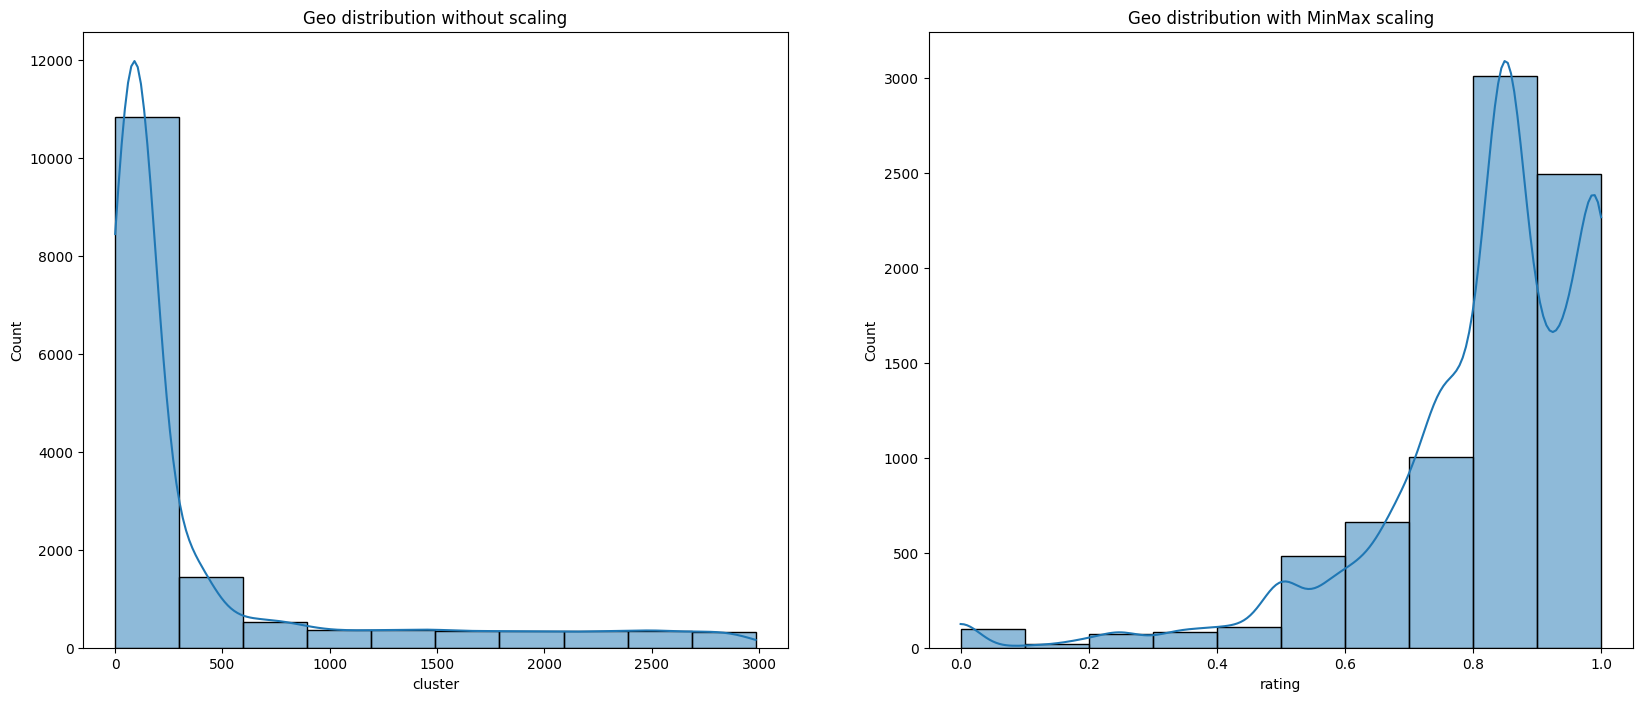

In [109]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=geo_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(geo_scale_minmax.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Geo distribution without scaling')
ax2.set_title('Geo distribution with MinMax scaling')

plt.show()


Starting the Inertia Score. the lower the better...

In [110]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(geo_scale_minmax)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

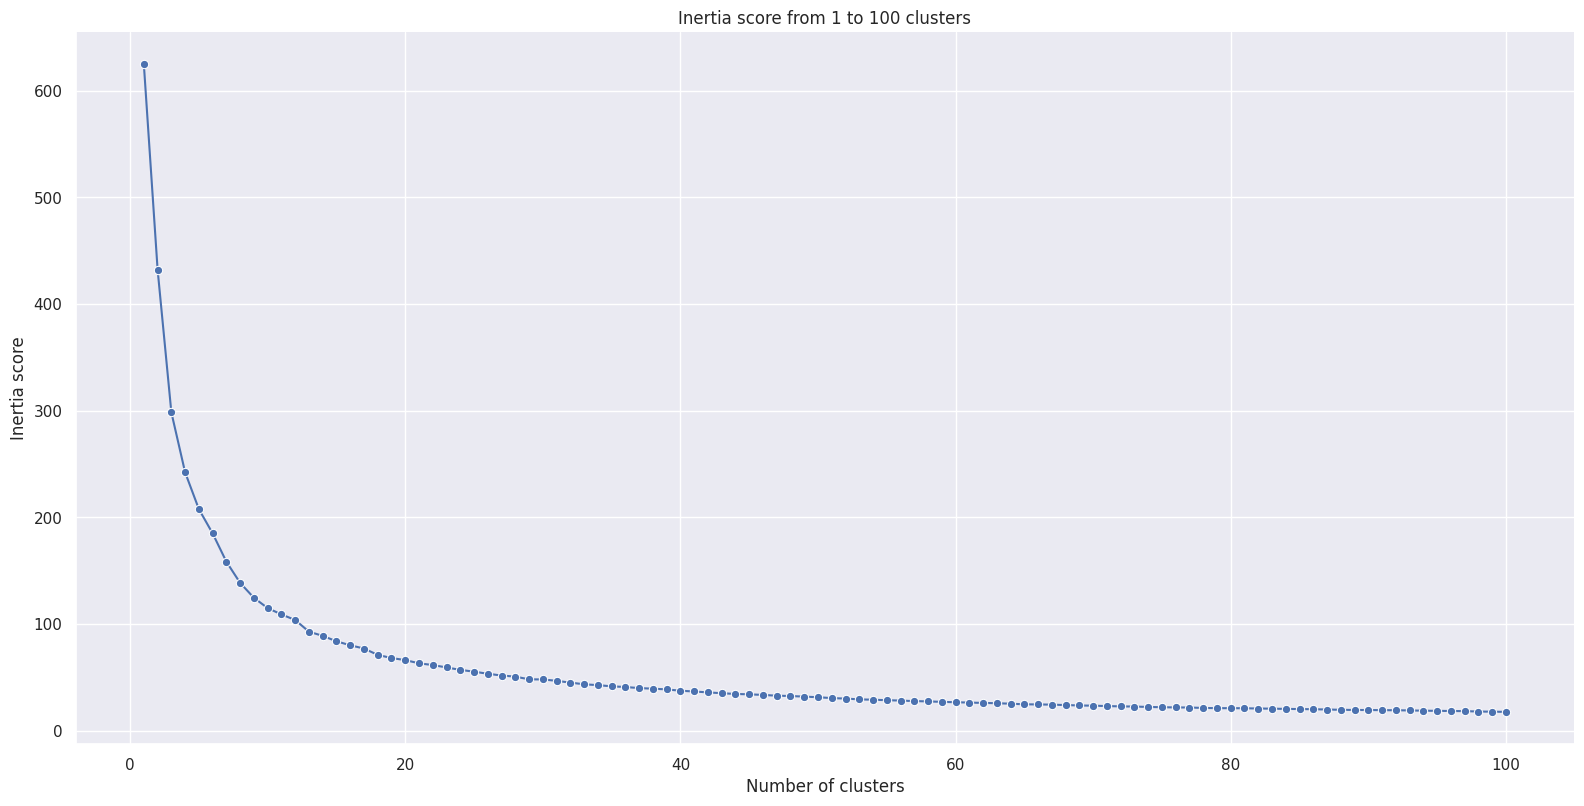

In [111]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

Starting the Silhoutte score. The higher the better

In [112]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(geo_scale_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(geo_scale_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

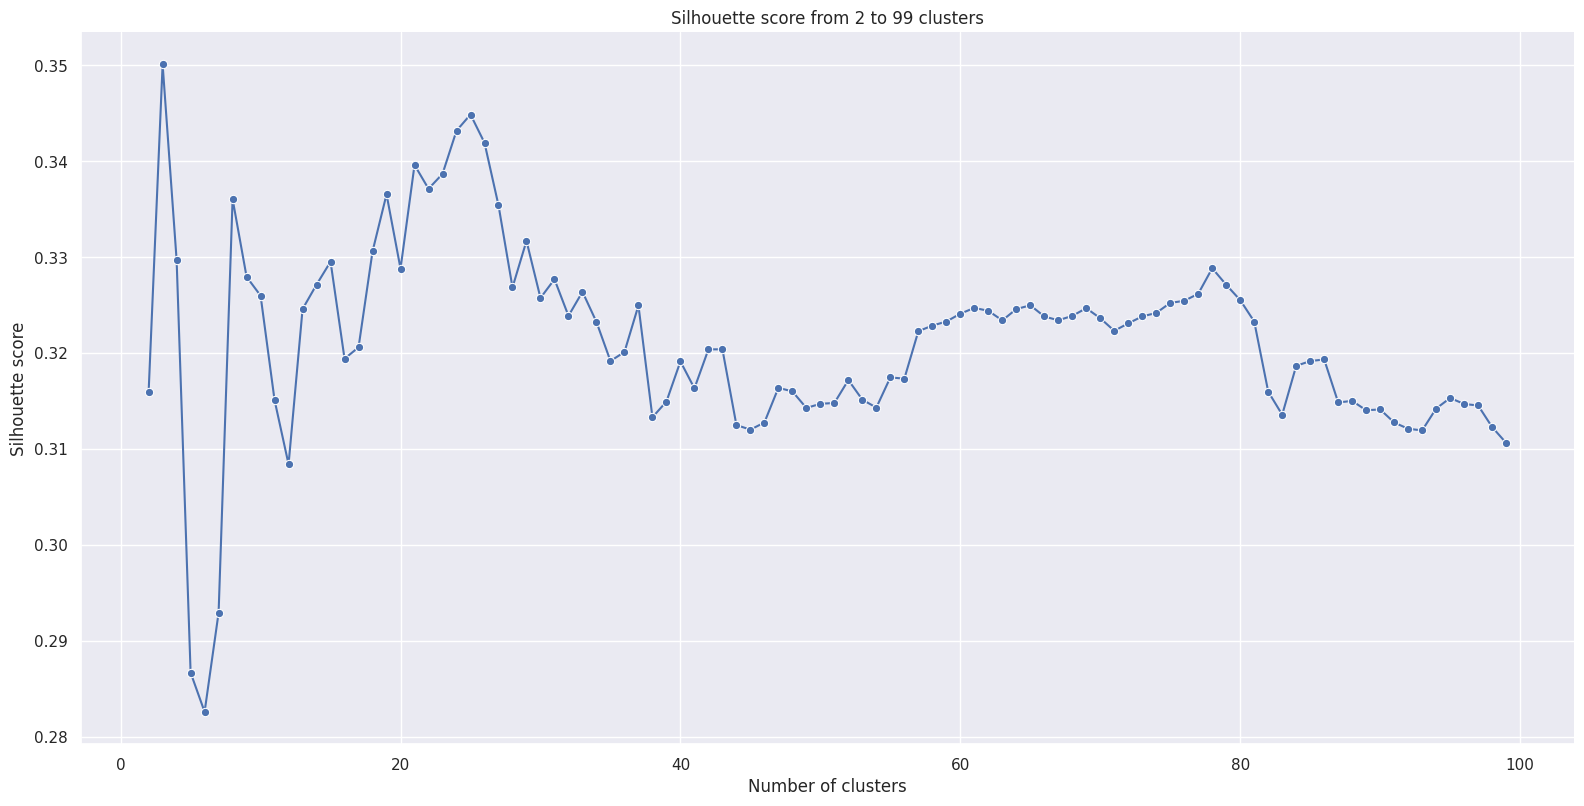

In [113]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

Going with 78 clusters

In [114]:
# initialize the model with scale_minmax dataframe
my_full_kmeans = KMeans(n_clusters = 78,
                        random_state = 123)

# fit the model to the data
my_full_kmeans.fit(geo_scale_minmax)

# obtain the cluster output
Loc_cluster = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
geo_scale_minmax["Loc_cluster"] = Loc_cluster

geo_scale_minmax.sort_values(by="Loc_cluster").head(10)

,latitude,longitude,rating,Loc_cluster
11177,0.570617,0.426729,0.850,0
14606,0.567388,0.382761,0.850,0
14571,0.582316,0.433417,0.850,0
14570,0.554708,0.405503,0.850,0
14568,0.550244,0.387912,0.850,0
14565,0.538416,0.408821,0.850,0
14563,0.561517,0.365148,0.875,0
14562,0.562486,0.363271,0.850,0
14524,0.582316,0.433417,0.850,0
14523,0.550638,0.424848,0.850,0


In [115]:
scaled_final = geo_scale_minmax.copy() #creating a copy of the table

In [116]:
scaled_final['Loc_cluster'].value_counts()

,count
Loc_cluster,
0,602
33,432
26,287
60,254
14,246
...,...
58,15
43,12
23,11


## Merging scaled table with clean_df.copy

In [117]:
scaled_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 98 to 19641
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     8040 non-null   float64
 1   longitude    8040 non-null   float64
 2   rating       8040 non-null   float64
 3   Loc_cluster  8040 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 282.7 KB


In [118]:
last_df= clean87_df.copy()
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 98 to 19641
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8040 non-null   float64
 1   longitude       8040 non-null   float64
 2   business_id     8040 non-null   object 
 3   rating          8040 non-null   float64
 4   timezone        8040 non-null   object 
 5   types           8040 non-null   object 
 6   city            8040 non-null   object 
 7   country         8040 non-null   object 
 8   usa_state_code  0 non-null      object 
 9   type_category   8040 non-null   object 
 10  cluster         8040 non-null   float64
dtypes: float64(4), object(7)
memory usage: 753.8+ KB


In [119]:
Loc_cluster_column = scaled_final['Loc_cluster']

In [120]:
last_df['Loc_cluster'] = Loc_cluster_column

In [121]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 98 to 19641
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8040 non-null   float64
 1   longitude       8040 non-null   float64
 2   business_id     8040 non-null   object 
 3   rating          8040 non-null   float64
 4   timezone        8040 non-null   object 
 5   types           8040 non-null   object 
 6   city            8040 non-null   object 
 7   country         8040 non-null   object 
 8   usa_state_code  0 non-null      object 
 9   type_category   8040 non-null   object 
 10  cluster         8040 non-null   float64
 11  Loc_cluster     8040 non-null   int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 785.2+ KB


In [122]:
last_df['Loc_cluster'].value_counts()

,count
Loc_cluster,
0,602
33,432
26,287
60,254
14,246
...,...
58,15
43,12
23,11


ANALYSIS

In [123]:
cluster_type_ratings_final = last_df.groupby(['Loc_cluster', 'type_category'])['rating'].mean().reset_index(name='avg_rating')
print(cluster_type_ratings_final)

     Loc_cluster    type_category  avg_rating
0              0                     4.394118
1              0       Automotive    4.325000
2              0        Education    4.400000
3              0          Finance    4.400000
4              0    Food_Beverage    4.390000
..           ...              ...         ...
604           77    Food_Beverage    3.185714
605           77       Healthcare    3.177778
606           77      Real_Estate    3.175000
607           77  Retail_Shopping    3.266667
608           77          Tourism    3.080000

[609 rows x 3 columns]


In [124]:
#Downloading to csv

#from google.colab import files
#cluster_type_ratings_final.to_csv('cluster_type_ratings_final.csv')
#files.download('cluster_type_ratings_final.csv')

Once we run our table in Looker to identify whith category type does best, or worse, than the rest, we can input the cluster number in the code below and see where exactly is recommended to open the business.

In [128]:
import plotly.express as px

# Get the cluster value dynamically from the user
cluster_value = int(input("So.. where at?: "))

# Filter the DataFrame based on the user-provided cluster value
cluster_interesting_data = last_df[last_df['Loc_cluster'] == cluster_value]

# Create the scatter mapbox
fig = px.scatter_mapbox(cluster_interesting_data, lat="latitude", lon="longitude",
                        color_discrete_sequence=["red"],
                        zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


So.. where at?: 28


Extra info for clustering with K-means vs DBSCAN

Reasoning

By including 'rating' in the clustering process, you're grouping businesses that are not only geographically close but also have similar ratings.
The custom distance metric allows you to combine geographic distance and rating difference in a way that makes sense for your data.
Experiment with the weights assigned to geographic distance and rating difference to find the best balance for your analysis.
Visualizing the clusters with a color scale based on 'rating' can help you understand how this variable influences the clustering results.

Important considerations

Scaling: Since geographic distance and rating are on different scales, consider standardizing or normalizing these variables before combining them in the distance metric. This ensures that one variable doesn't dominate the other.
Weighting: The weights assigned to geographic distance and rating difference in the custom distance metric will significantly impact the clustering results. Carefully consider the relative importance of these variables in your analysis and adjust the weights accordingly.
Visualization: Explore different visualization techniques to effectively represent the three-dimensional clustering results. For example, you could use 3D scatter plots or interactive maps with color scales and tooltips to provide a more comprehensive view of the clusters.